# WeatherPy - Aaron Wollman
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
import sys
sys.path.append("..")
from api_keys import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
sample_size = 1500
lats = np.random.uniform(lat_range[0], lat_range[1], size=sample_size)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=sample_size)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Function to call OpenWeatherMap's API
weather_baseurl = "http://api.openweathermap.org/data/2.5/weather?"

def get_city_weather(city):
    weather_params = {
        "appid" : weather_api_key,
        "q" : city
    }
    
    weather_response = requests.get(weather_baseurl, params = weather_params)
    return weather_response.json()

In [4]:
# Helpers to save data from JSON to an object
class City_Weather_Columns:
    city = "City"
    lat = "Lat"
    lng = "Lng"
    max_temp = "Max Temp"
    humidity = "Humidity"
    cloudiness = "Cloudiness"
    wind_speed = "Wind Speed"
    country = "country"
    date = "Date"
       
def process_weather_json(json):
    return {
        City_Weather_Columns.city : json["name"],
        City_Weather_Columns.lat : json["coord"]["lat"],
        City_Weather_Columns.lng : json["coord"]["lon"],
        City_Weather_Columns.max_temp : json["main"]["temp_max"],
        City_Weather_Columns.humidity : json["main"]["humidity"],
        City_Weather_Columns.cloudiness : json["clouds"]["all"],
        City_Weather_Columns.wind_speed : json["wind"]["speed"],
        City_Weather_Columns.country : json["sys"]["country"],
        City_Weather_Columns.date : json["dt"]
    }

In [5]:
# Load the data from OpenWeatherMap into city_weather_list
print("Beginning Data Retrieval")
print("-----------------------------")

record_num = 1;
set_num = 1;
city_weather_list = []
for city in cities:
    
    try:
        city_weather_json = get_city_weather(city)     
        city_weather = process_weather_json(city_weather_json)
        city_name = city_weather[City_Weather_Columns.city]
        print(f"Processing Record {record_num} of Set {set_num} | {city_name}")
        city_weather_list.append(city_weather)
    except:
        print("City not found. Skipping...")
    
    # Keep Record Count; Sets of 50
    record_num += 1
    if(record_num > 50):
        set_num += 1
        record_num = 1
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Arcata
Processing Record 2 of Set 1 | Port Alfred
Processing Record 3 of Set 1 | Bredasdorp
Processing Record 4 of Set 1 | Port-Gentil
Processing Record 5 of Set 1 | Sobolevo
Processing Record 6 of Set 1 | Walvis Bay
Processing Record 7 of Set 1 | Khandyga
Processing Record 8 of Set 1 | Marfino
Processing Record 9 of Set 1 | Clyde River
Processing Record 10 of Set 1 | Dolisie
Processing Record 11 of Set 1 | Ambunti
Processing Record 12 of Set 1 | Bhadrāchalam
Processing Record 13 of Set 1 | Severnoye
Processing Record 14 of Set 1 | Lanxi
Processing Record 15 of Set 1 | Ushuaia
Processing Record 16 of Set 1 | Novobirilyussy
Processing Record 17 of Set 1 | Shonguy
Processing Record 18 of Set 1 | Upernavik
Processing Record 19 of Set 1 | Bluff
Processing Record 20 of Set 1 | Camacha
Processing Record 21 of Set 1 | Yangi Marg`ilon
Processing Record 22 of Set 1 | Touros
Processing Record 23 of Set 1 | Cape

Processing Record 2 of Set 5 | Zemio
Processing Record 3 of Set 5 | San Antonio
Processing Record 4 of Set 5 | Lorengau
Processing Record 5 of Set 5 | Rawson
Processing Record 6 of Set 5 | Pisco
Processing Record 7 of Set 5 | Stephenville
Processing Record 8 of Set 5 | Tarko-Sale
Processing Record 9 of Set 5 | Sicuani
Processing Record 10 of Set 5 | Kahului
Processing Record 11 of Set 5 | Bogorodskoye
Processing Record 12 of Set 5 | Barranca
Processing Record 13 of Set 5 | Cayenne
Processing Record 14 of Set 5 | San Quintín
Processing Record 15 of Set 5 | Madisonville
Processing Record 16 of Set 5 | Takoradze
Processing Record 17 of Set 5 | Valkenswaard
Processing Record 18 of Set 5 | Puerto Ayacucho
Processing Record 19 of Set 5 | Bethel
Processing Record 20 of Set 5 | Kruisfontein
Processing Record 21 of Set 5 | Ribeira Grande
Processing Record 22 of Set 5 | Agüimes
City not found. Skipping...
City not found. Skipping...
Processing Record 25 of Set 5 | Linxia Chengguanzhen
Processing

Processing Record 8 of Set 9 | Port Lincoln
Processing Record 9 of Set 9 | Tsabong
Processing Record 10 of Set 9 | Nola
Processing Record 11 of Set 9 | Salisbury
Processing Record 12 of Set 9 | Sokoni
Processing Record 13 of Set 9 | Manado
Processing Record 14 of Set 9 | Port Blair
Processing Record 15 of Set 9 | Santa Rosa
Processing Record 16 of Set 9 | Northam
Processing Record 17 of Set 9 | Jaguaruna
City not found. Skipping...
City not found. Skipping...
Processing Record 20 of Set 9 | Mareeba
Processing Record 21 of Set 9 | Tuy Hoa
Processing Record 22 of Set 9 | Smyrna
Processing Record 23 of Set 9 | Mabaruma
Processing Record 24 of Set 9 | Gīdam
Processing Record 25 of Set 9 | Aden
Processing Record 26 of Set 9 | Necochea
Processing Record 27 of Set 9 | Katsuura
Processing Record 28 of Set 9 | Rakaia
Processing Record 29 of Set 9 | Kalamare
Processing Record 30 of Set 9 | Saiha
Processing Record 31 of Set 9 | Berlevåg
Processing Record 32 of Set 9 | Waingapu
Processing Record 3

City not found. Skipping...
Processing Record 8 of Set 13 | Romans-sur-Isère
Processing Record 9 of Set 13 | Lamu
Processing Record 10 of Set 13 | Waddān
Processing Record 11 of Set 13 | Borogontsy
Processing Record 12 of Set 13 | Lincoln
Processing Record 13 of Set 13 | Sikonge
Processing Record 14 of Set 13 | Ayní
City not found. Skipping...
Processing Record 16 of Set 13 | Torbay
Processing Record 17 of Set 13 | Luang Prabang
Processing Record 18 of Set 13 | Sept-Îles
Processing Record 19 of Set 13 | Shingū
Processing Record 20 of Set 13 | Semme
Processing Record 21 of Set 13 | Petropavlovsk-Kamchatskiy
Processing Record 22 of Set 13 | Pacific Grove
Processing Record 23 of Set 13 | Brookings
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Convert to DataFrame
city_weather_df = pd.DataFrame(city_weather_list)
city_weather_df = city_weather_df.dropna()
city_weather_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
country       581
Date          581
dtype: int64

In [7]:
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,country,Date
0,Arcata,40.87,-124.08,293.15,72,75,3.60,US,1595538177
1,Port Alfred,-33.59,26.89,290.72,43,0,4.48,ZA,1595538224
2,Bredasdorp,-34.53,20.04,284.15,93,0,1.50,ZA,1595538224
3,Port-Gentil,-0.72,8.78,297.51,79,88,5.45,GA,1595538072
4,Sobolevo,54.43,31.90,282.84,90,0,3.19,RU,1595538225


In [11]:
# Save to CSV
city_weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.00000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.049828,19.25401,293.697332,70.764200,52.127367,3.440103,1.595538e+09
std,33.160858,92.02331,8.007062,19.322253,38.011944,2.330442,7.849483e+01
min,-54.800000,-179.17000,271.150000,3.000000,0.000000,0.050000,1.595538e+09
25%,-5.110000,-64.62000,288.150000,59.000000,11.000000,1.770000,1.595538e+09
50%,21.350000,22.75000,294.970000,74.000000,62.000000,3.000000,1.595538e+09
75%,48.010000,103.21000,299.160000,86.000000,90.000000,4.690000,1.595538e+09
max,77.480000,179.32000,312.880000,100.000000,100.000000,13.410000,1.595538e+09


In [13]:
#  Get the indices of cities that have humidity over 100%.
over_100_humid = city_weather_df.loc[city_weather_df[City_Weather_Columns.humidity] > 100].index
over_100_humid

Int64Index([], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.drop(over_100_humid)
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.00000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,20.049828,19.25401,293.697332,70.764200,52.127367,3.440103,1.595538e+09
std,33.160858,92.02331,8.007062,19.322253,38.011944,2.330442,7.849483e+01
min,-54.800000,-179.17000,271.150000,3.000000,0.000000,0.050000,1.595538e+09
25%,-5.110000,-64.62000,288.150000,59.000000,11.000000,1.770000,1.595538e+09
50%,21.350000,22.75000,294.970000,74.000000,62.000000,3.000000,1.595538e+09
75%,48.010000,103.21000,299.160000,86.000000,90.000000,4.690000,1.595538e+09
max,77.480000,179.32000,312.880000,100.000000,100.000000,13.410000,1.595538e+09


In [32]:
# Extract relevant fields from the data frame
final_columns = [City_Weather_Columns.lat, 
                 City_Weather_Columns.lng,
                 City_Weather_Columns.max_temp, 
                 City_Weather_Columns.humidity, 
                 City_Weather_Columns.cloudiness,
                 City_Weather_Columns.wind_speed]
final_city_data = clean_city_data[final_columns]
final_city_data.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,40.87,-124.08,293.15,72,75,3.60
1,-33.59,26.89,290.72,43,0,4.48
2,-34.53,20.04,284.15,93,0,1.50
3,-0.72,8.78,297.51,79,88,5.45
4,54.43,31.90,282.84,90,0,3.19


In [34]:
# Export the City_Data into a csv
final_city_data.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [35]:
def savefig(filename):
    plt.savefig(f"images/{filename}.png")

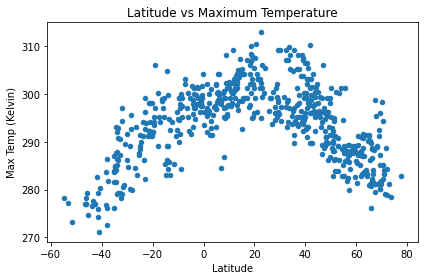

In [37]:
def plot_lat_v_temp(df):
    plot = df.plot(kind="scatter", \
            x = City_Weather_Columns.lat, y = City_Weather_Columns.max_temp)
    plt.title("Latitude vs Maximum Temperature")
    plt.ylabel("Max Temp (Kelvin)")
    plt.xlabel("Latitude")

plot_lat_v_temp(final_city_data)
plt.tight_layout()
savefig("lat_v_temp")
plt.show()

## Latitude vs. Humidity Plot

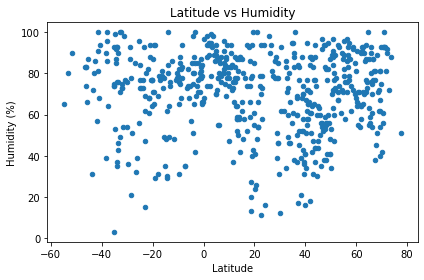

In [38]:
def plot_lat_v_humid(df):
    plot = df.plot(kind="scatter", \
            x = City_Weather_Columns.lat, y = City_Weather_Columns.humidity)
    plt.title("Latitude vs Humidity")
    plt.ylabel("Humidity (%)")
    plt.xlabel("Latitude")

plot_lat_v_humid(final_city_data)
plt.tight_layout()
savefig("lat_v_humid")
plt.show()

## Latitude vs. Cloudiness Plot

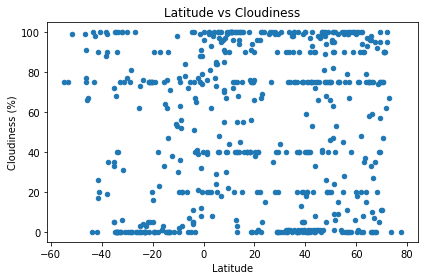

In [39]:
def plot_lat_v_cloud(df):
    plot = df.plot(kind="scatter", \
            x = City_Weather_Columns.lat, y = City_Weather_Columns.cloudiness)
    plt.title("Latitude vs Cloudiness")
    plt.ylabel("Cloudiness (%)")
    plt.xlabel("Latitude")

plot_lat_v_cloud(final_city_data)
plt.tight_layout()
savefig("lat_v_cloud")
plt.show()

## Latitude vs. Wind Speed Plot

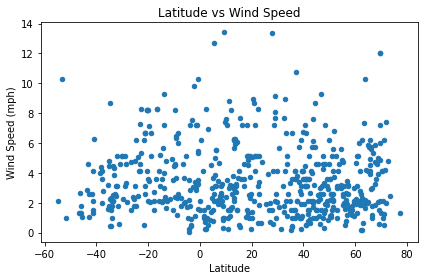

In [40]:
def plot_lat_v_wind(df):
    df.plot(kind="scatter", \
            x = City_Weather_Columns.lat, y = City_Weather_Columns.wind_speed)
    plt.title("Latitude vs Wind Speed")
    plt.ylabel("Wind Speed (mph)")
    plt.xlabel("Latitude")

plot_lat_v_wind(final_city_data)
plt.tight_layout()
savefig("lat_v_wind")
plt.show()

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_lin_reg(dataframe, x_col, y_col):
    x_values = dataframe[x_col]
    y_values = dataframe[y_col]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regress_plot, = plt.plot(x_values, regress_values, "r-", label=equation)
    plt.legend(handles=[regress_plot], loc="best")
    print(f"The r-squared value is {rvalue * rvalue}")

In [22]:
# Create Northern and Southern Hemisphere DataFrames
north_df = final_city_data.loc[final_city_data[City_Weather_Columns.lat] >= 0]
north_df.head()

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,40.87,293.15,72,75,3.60
4,54.43,282.84,90,0,3.19
6,62.67,291.65,65,8,0.15
7,55.70,285.93,76,0,2.00
8,70.47,282.15,61,75,4.10


In [23]:
south_df = final_city_data.loc[final_city_data[City_Weather_Columns.lat] < 0]
south_df.head()

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
1,-33.59,290.72,43,0,4.48
2,-34.53,284.15,93,0,1.50
3,-0.72,297.51,79,88,5.45
5,-22.96,296.15,15,0,4.10
9,-4.20,293.18,75,11,2.21


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.44873600980268796


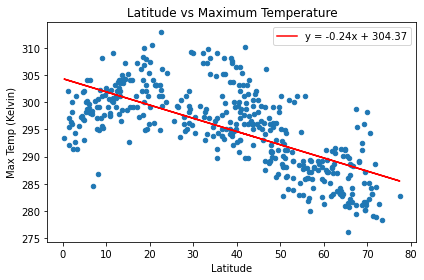

In [41]:
plot_lat_v_temp(north_df)
plot_lin_reg(north_df, City_Weather_Columns.lat, City_Weather_Columns.max_temp)
plt.tight_layout()
savefig("north_lat_v_temp")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.6494338775182205


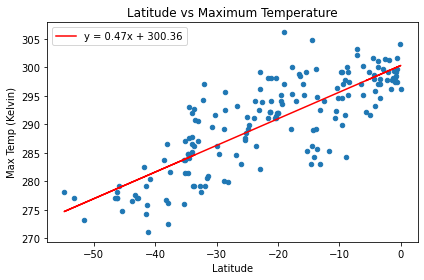

In [42]:
plot_lat_v_temp(south_df)
plot_lin_reg(south_df, City_Weather_Columns.lat, City_Weather_Columns.max_temp)
plt.tight_layout()
savefig("south_lat_v_temp")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.0012616360166026429


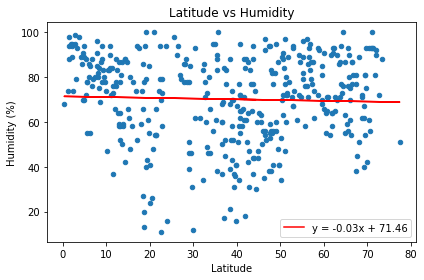

In [43]:
plot_lat_v_humid(north_df)
plot_lin_reg(north_df, City_Weather_Columns.lat, City_Weather_Columns.humidity)
plt.tight_layout()
savefig("north_lat_v_humid")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.00034967350347296346


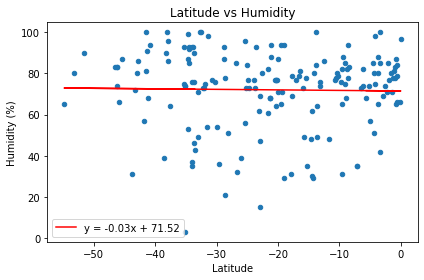

In [44]:
plot_lat_v_humid(south_df)
plot_lin_reg(south_df, City_Weather_Columns.lat, City_Weather_Columns.humidity)
plt.tight_layout()
savefig("south_lat_v_humid")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.008977956705587183


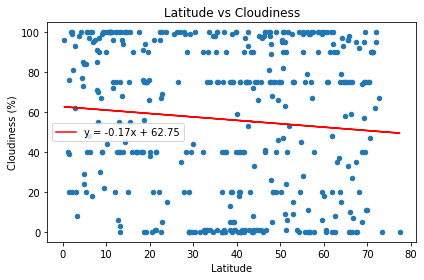

In [45]:
plot_lat_v_cloud(north_df)
plot_lin_reg(north_df, City_Weather_Columns.lat, City_Weather_Columns.cloudiness)
plt.tight_layout()
savefig("north_lat_v_cloud")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.006924544951945915


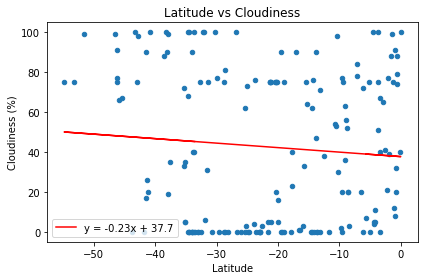

In [46]:
plot_lat_v_cloud(south_df)
plot_lin_reg(south_df, City_Weather_Columns.lat, City_Weather_Columns.cloudiness)
plt.tight_layout()
savefig("south_lat_v_cloud")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0003690465023236862


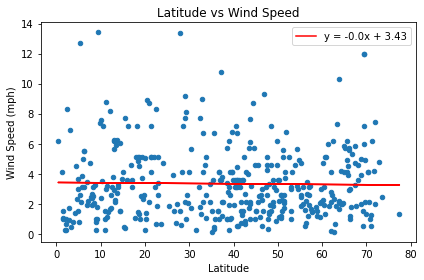

In [30]:
plot_lat_v_wind(north_df)
plot_lin_reg(north_df, City_Weather_Columns.lat, City_Weather_Columns.wind_speed)
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.021336300387709055


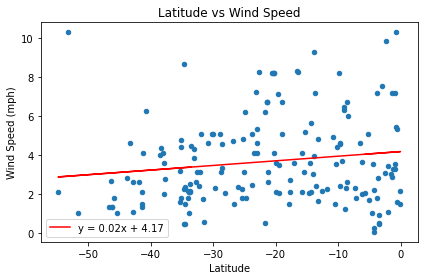

In [31]:
plot_lat_v_wind(south_df)
plot_lin_reg(south_df, City_Weather_Columns.lat, City_Weather_Columns.wind_speed)
plt.tight_layout()
plt.show()